<h1>Importing Libraries</h1>

In [18]:
"""
Code borrowed from: https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4
Dataset collected from: https://drive.google.com/file/d/1GfvKA0qznNVknghV4botnNxyH-KvODOC/view

Features included in the dataset:
- Lot Area (in sq ft)
- Overall Quality (scale from 1 to 10)
- Overall Condition (scale from 1 to 10)
- Total Basement Area (in sq ft)
- Number of Full Bathrooms
- Number of Half Bathrooms
- Number of Bedrooms above ground
- Total Number of Rooms above ground
- Number of Fireplaces
- Garage Area (in sq ft)

"""
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

<h1>Data Preprocessing</h1>

In [19]:
df = pd.read_csv('C:/Books/Texas State Books/House_Prices/housepricedata.csv')
print(df.head())

   LotArea  OverallQual  OverallCond  TotalBsmtSF  FullBath  HalfBath  \
0     8450            7            5          856         2         1   
1     9600            6            8         1262         2         0   
2    11250            7            5          920         2         1   
3     9550            7            5          756         1         0   
4    14260            8            5         1145         2         1   

   BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageArea  AboveMedianPrice  
0             3             8           0         548                 1  
1             3             6           1         460                 1  
2             3             6           1         608                 1  
3             3             7           1         642                 0  
4             4             9           1         836                 1  


In [20]:
# Separate features from labels in arrays
X = df.iloc[:,0:10].values
Y = df.iloc[:,10].values

In [21]:
# Normalize features between 0 and 1, inclusive
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [22]:
# Create the training and test split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

# Furthermore, create the validation split
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


<h1>Training</h1>

In [23]:
# Define the MLP architecture
model = keras.models.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

In [24]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 618us/sample - loss: 0.7232 - accuracy: 0.4932 - val_loss: 0.7107 - val_accuracy: 0.5160
Epoch 2/100
1022/1022 [==============================] - 0s 79us/sample - loss: 0.7116 - accuracy: 0.4922 - val_loss: 0.7031 - val_accuracy: 0.5205
Epoch 3/100
1022/1022 [==============================] - 0s 79us/sample - loss: 0.7037 - accuracy: 0.4873 - val_loss: 0.6976 - val_accuracy: 0.4932
Epoch 4/100
1022/1022 [==============================] - 0s 99us/sample - loss: 0.6982 - accuracy: 0.4716 - val_loss: 0.6935 - val_accuracy: 0.4932
Epoch 5/100
1022/1022 [==============================] - 0s 169us/sample - loss: 0.6941 - accuracy: 0.5059 - val_loss: 0.6902 - val_accuracy: 0.4886
Epoch 6/100
1022/1022 [==============================] - 0s 102us/sample - loss: 0.6908 - accuracy: 0.5342 - val_loss: 0.6876 - val_accuracy: 0.5753
Epoch 7/100
1022/1022 [==============================] - 0s 10

1022/1022 [==============================] - 0s 78us/sample - loss: 0.4331 - accuracy: 0.8513 - val_loss: 0.4167 - val_accuracy: 0.8676
Epoch 56/100
1022/1022 [==============================] - 0s 73us/sample - loss: 0.4261 - accuracy: 0.8542 - val_loss: 0.4091 - val_accuracy: 0.8676
Epoch 57/100
1022/1022 [==============================] - 0s 73us/sample - loss: 0.4192 - accuracy: 0.8591 - val_loss: 0.4018 - val_accuracy: 0.8676
Epoch 58/100
1022/1022 [==============================] - 0s 73us/sample - loss: 0.4122 - accuracy: 0.8581 - val_loss: 0.3949 - val_accuracy: 0.8676
Epoch 59/100
1022/1022 [==============================] - 0s 66us/sample - loss: 0.4057 - accuracy: 0.8562 - val_loss: 0.3880 - val_accuracy: 0.8676
Epoch 60/100
1022/1022 [==============================] - 0s 66us/sample - loss: 0.3995 - accuracy: 0.8611 - val_loss: 0.3824 - val_accuracy: 0.8676
Epoch 61/100
1022/1022 [==============================] - 0s 66us/sample - loss: 0.3937 - accuracy: 0.8630 - val_loss: 

<h1>Testing</h1>

In [26]:
model.evaluate(X_test, Y_test)

219/219 [==============================] - 0s 59us/sample - loss: 0.2940 - accuracy: 0.8676


[0.29403656775548576, 0.86757994]

<h1>Plots</h1>

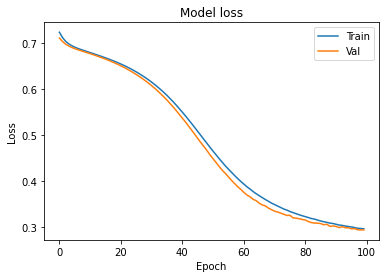

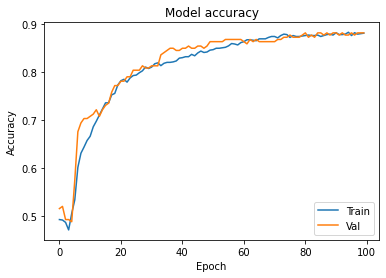

In [27]:
# PLot the losses
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# PLot the accuracies
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()